<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Проект:</b> Анализ оттоков клиентов в банке. 


<b>Цель проекта:</b> Поиск и анализ оттока, сегментирование клиентов и формирование рекомендаций для отдела маркетинга.

<b>Описание данных:</b>
    
•	userid — идентификатор (не используется активно при анализе)
    
•	score — баллы кредитного скоринга (оценка банка надежности клиента )
    
•	city  — город (место нахождения филиала банка)
    
•	gender  — пол клиента
    
•	age  — возраст клиента   
    
•	equity  — количество балла собственности (оценка банком кол-ва собственности клиента)
    
•	balance — баланс
    
•	products — количество продуктов
    
•	credit_card — наличие кредитной карты (есть ли у клиента кредит)
    
•	last_activity — активный клиент (два состояния: активен или неактивен(т.е. не пользуется продуктами банка))
    
•	est_salary — заработная плата клиента
    
•	churn — отток (ушел клиент или не ушел)
    

   </b>
    
Путь к файлу: : /datasets/bank_scrooge.csv. 
  




<b>Этапы проекта:</b>

1.Подготовка данных:
- 1.1. Импорт библиотек.
- 1.2. Вывод информации о датафрейме.
- 1.3. Классификация (анализ природы пропусков MCAR,MAR или MNAR) и обработка пропусков (например, в столбце balance).
- 1.4. Преобразование названия столбцов к единому стилю. 
- 1.5. Кодирование (для использования в анализе корреляции). Преобразование категориальных переменных в числовые значения (если не использовать Phi coefficient).
- 1.6. Нормализация/стандартизация: приведение числовых признаков к единому масштабу.

- 1.7. Анализ неявных дубликатов по user_id.

2. Предобработка данных:
- 2.1. Анализ распределения признаков в разрезе оттока.
   2.1.1.Разделыем на две составные группы непрерывные - ищем отточные интервалы, где отток превышает лояльность. Используем нормированные гистограммы, потому что у нас выборки разного размера. Определяем где отток превышает лояльность (т.е.выделяем сегмент).
   2.1.2. Следующая группа категориальные/дискретные - ищем значения признака с оттоком выше, по банку. Т.е. есть среднее значение оттока по банку - сравнивем его со значением (пр. пол клиента). Т.о. находим еще один сегмент.;
- 2.2. Анализ портретов клиентов в разрезе оттока. 
  2.2.1. Сводная таблица по Отток-Неотток по каждому столбцу ;
  2.2.2. Формирование столбца относительной разницы. Т.е. формируем портрет отточного и не отточного клиента. 
- 2.3 Корреляционный анализ признака churn с другими признаками (в тч интерпретация по Чеддоку).
- портрет клиента - таблица и интерпретация.
- корреляция - столбец для оттока и интерпретация.

3. Проверка статистических гипотез.

3.1. Проверка первой гипотезы : средние значения заработной платы между группами клиентов, которые ушли и которые остались различны, т.е. есть статистически значимые различия между этими группами. Вторрая гипотеза будет определена в ходе проведения исследования.
3.2. Обоснование выбора теста.


4. Подведение промежуточных итогов - выводы по результатам EDA, корреляционного анализа и
гипотез, выделение признаков, влияющих на оттток. Явное указание признаков и их значений, которые использовали для сегментации.

5. Сегментация (три признака: 1. Неузкие сегменты (от 500 клиентов на сегмент); 2.Не менее трёх; 3.Отток выше, чем
средний уровень оттока по банку).

6. Приоритизация сегментов. Ранжирование и выявление приоритетных сегментов для упрощения работы отдела маркетинга.

7. Формирование рекомендаций (таргетированных) по работе с ними. Для каждого сегмента индивидульная рекомендация.

## Материалы
[Презентация](https://disk.yandex.ru/i/5kAXD8Vp1ROaow)

## Предобработка данных.

### Импорт библиотек.

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
import warnings
import os
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
# инсталяция библиотеки phik
!pip install phik

In [3]:
import phik 

### Чтение файлов.

In [4]:
pth1 = '/datasets/bank_scrooge.csv' # яндексовский путь
pth2 = 'C:/Users/pimjo/Downloads/bank_scrooge.csv' # мой путь

if os.path.exists(pth1):
    data = pd.read_csv('/datasets/bank_scrooge.csv') 
    
elif os.path.exists(pth2):
    data = pd.read_csv("C:/Users/pimjo/Downloads/bank_scrooge.csv") 
    
else:
    print('Something is wrong')    


### Преобразование названия столбцов к единому стилю. 

In [5]:
# Датасет , название колонок в нижн. регистре
data.columns = data.columns.str.lower()


### Вывод информации о датафрейме.

In [6]:
# Функция вывода инф-ции о датафрейме
def data_info(data):
    try:
        display('Первые пять строк данных:')
        display(data.head(5))
        display('Описание данных:')
        display(data.describe())
        display('Общая информацию о датафрейме')
        display(data.info())
        display('Количество пропусков в процентах')
        display(pd.DataFrame(round(data.isna().mean()*100,1).sort_values()).style.background_gradient('Blues'))
#  pandas_profiling.ProfileReport(data)
    except:
        return 'Проверьте данные'
    
data_info(data)

'Первые пять строк данных:'

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


'Описание данных:'

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


'Общая информацию о датафрейме'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

'Количество пропусков в процентах'

,0
userid,0.000000
score,0.000000
city,0.000000
gender,0.000000
equity,0.000000
products,0.000000
credit_card,0.000000
last_activity,0.000000
est_salary,0.000000
churn,0.000000


Данные на первый взгляд чистые. Пропуски только в двух столбцах: возраст и баланс.

### Выяснение типа пропусков и зависимости пропусков от других столбцов.

In [7]:
# добавляем столбец с пропусками в balance и age
data['balance_missing'] = data['balance'].isnull().astype(int)
data['age_missing'] = data['age'].isnull().astype(int)
data_without_id = data.drop('userid', axis=1)
#correlation = data_without_id.corr()
#display(correlation['balance_missing'])
# необходимые столбцы присутствуют в датафрейме
required_columns = ['score', 'city', 'gender', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn','balance_missing','age_missing']
data_reg = data_without_id[required_columns]

# Настройка параметра interval_cols, дискретные признаки здесь не участвуют
interval_cols = ['score', 'age', 'balance', 'est_salary']
# Вычисление матрицы корреляции с использованием phik
correlation_matrix = data_reg.phik_matrix(interval_cols=interval_cols)

# Получение корреляции с признаком 'balance_missing'
balance_missing_correlation = correlation_matrix['balance_missing']

# Вывод результатов
display("Корреляция признаков с balance_missing")
display(balance_missing_correlation.sort_values(ascending=False))

'Корреляция признаков с balance_missing'

balance_missing    1.000000
equity             0.975823
products           0.793178
score              0.755046
est_salary         0.430502
churn              0.381123
credit_card        0.245296
gender             0.097850
age_missing        0.068092
age                0.047756
last_activity      0.041281
city               0.040277
balance                 NaN
Name: balance_missing, dtype: float64

Вывод: Коэффициент корреляции 0.97 указывет на достаточно сильную  связь со столбцом equity - кол-во балов собственности, это значит, что можно ожидать пропуски при высоких значениях в столбце equity.

 Коэффициент корреляции 0.79 может свидетельствовать о том, что пропуски в столбце могут быть связаны с определёнными значениями в столбце products - колличество продуктов.
 
Коэффициент корреляции 0.75 может свидетельствовать о том, что пропуски в столбце могут быть связаны с определёнными значениями в столбце score - оценкой банка надежности. 
 Коэффициент корреляции 0.43 указывает на слабую положительную корреляцию между наличием пропусков в столбце и значениями в  столбце est_salary - заработная плата клиента. 
 
 
Значимый вывод: Наличие баллов собственности может быть индикатором финансовой стабильности или активности клиента, что, в свою очередь, влияет на полноту данных о его балансе.

В части пропусков используем общепринятую классификациею пропусков:

MCAR (Missing Completely At Random / Отсутствует совершенно случайно) — пропуски не зависят от переменных и не ведут к систематической ошибке (смещение, bias), но увеличивают случайную ошибку (разброс, variance), можно их отбрасывать или заполнять, т.к. заполнение не повлияет на характер связи между заполняемой переменной и остальными;

MAR (Missing At Random / Отсутствует случайно) — в рамках каждой из групп, которая есть в описываемой данными совокупности, распределение пропусков случайно, можно их отбрасывать;

MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.

In [8]:
display(data[data['balance'].isna()]['equity'].value_counts())
# Фильтрация данных, где equity равно 0
mean_balance_equity_0 = data[data['equity'] == 0]['balance'].mean()

display(f"Среднее значение balance для equity равным 0: {mean_balance_equity_0}")

0    2180
1     114
3       1
Name: equity, dtype: int64

'Среднее значение balance для equity равным 0: 156473.34968446603'

Вывод: Пропуски в столбце balance в 95 % при нулевом балле недвижимости у клиентов. Логичнее возможно поставить среднее значение в этом случае в баланс клиента, но придерживаемся классу MNAR и оставляем пропуски без изменений.

In [9]:
#display(correlation['age_missing'])
# Получение корреляции с признаком 'balance_missing'
age_missing_correlation = correlation_matrix['age_missing']

# Вывод результатов
display("Корреляция признаков с age_missing")
display(age_missing_correlation.sort_values(ascending=False))

'Корреляция признаков с age_missing'

age_missing        1.000000
balance_missing    0.068092
score              0.059585
products           0.044816
equity             0.038201
last_activity      0.032798
churn              0.020515
city               0.011859
est_salary         0.009403
gender             0.000000
balance            0.000000
credit_card        0.000000
age                     NaN
Name: age_missing, dtype: float64

Вывод: Пропуски в столбце age не коррелируют ни с одним столбцом и относятся к классу MCAR, их нужно удалить.

In [10]:
data = data.dropna(subset=['age'])

### Проверка на дубликаты.

#### Явные дубликаты.

In [11]:
display (f"Дубликаты в датафрейме:{data.duplicated().sum()}")

'Дубликаты в датафрейме:0'

In [12]:

# Функция для вывода уникальных значений в столбце датафрейма
def get_value_counts(column):
        return column.unique()
    
display(data.apply(get_value_counts))


userid             [183012, 146556, 120722, 225363, 157978, 20230...
score              [850.0, 861.0, 892.0, 866.0, 730.0, 856.0, 807...
city                                    [Рыбинск, Ярославль, Ростов]
gender                                                        [Ж, М]
age                [25.0, 37.0, 30.0, 51.0, 34.0, 56.0, 39.0, 38....
equity                                [1, 5, 0, 4, 3, 2, 6, 7, 8, 9]
balance            [59214.82, 850594.33, nan, 1524746.26, 174.0, ...
products                                          [2, 3, 1, 4, 5, 0]
credit_card                                                   [0, 1]
last_activity                                                 [1, 0]
est_salary         [75719.14, 86621.77, 107683.34, 174423.53, 673...
churn                                                         [1, 0]
balance_missing                                               [0, 1]
age_missing                                                      [0]
dtype: object

Вывод явных дубликатов нет.

#### Неявные дубликаты.

In [13]:
display(data[data.duplicated(subset = 'userid', keep=False)])

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing,age_missing
58,164676,860.0,Ярославль,М,37.0,5,648594.03,2,1,1,213586.86,1,0,0
150,185748,850.0,Рыбинск,М,36.0,5,1203376.67,2,0,1,89401.82,1,0,0
161,197364,928.0,Рыбинск,Ж,53.0,6,1347183.86,2,0,1,168189.49,1,0,0
231,190253,823.0,Рыбинск,М,37.0,4,373348.39,2,0,1,131947.92,1,0,0
690,152479,768.0,Рыбинск,Ж,42.0,0,126787.79,4,1,1,143233.23,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9659,195884,767.0,Рыбинск,Ж,45.0,1,335652.56,3,1,1,100197.67,0,0,0
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0,0,0
9785,168998,895.0,Рыбинск,М,44.0,0,282653.53,3,0,0,255296.47,0,0,0
9880,217412,886.0,Ярославль,Ж,35.0,3,1026172.14,2,1,0,53099.16,0,0,0


In [14]:
# Получаем первое вхождение для каждого userid
first_occurrences = data[data.duplicated(subset='userid', keep=False)].drop_duplicates(subset='userid')

# Получаем все дубликаты
duplicates = data[data.duplicated(subset='userid', keep=False)]

# Объединяем первое вхождение с дубликатами
duplicates_with_first = pd.concat([first_occurrences, duplicates]).drop_duplicates().sort_values(by='userid')

# Вывод 
display(duplicates_with_first)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing,age_missing
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0,1,0
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1,0,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0,1,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1,0,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,220816,840.0,Ярославль,Ж,41.0,3,1193287.13,2,1,1,76434.94,1,0,0
4216,226719,903.0,Рыбинск,Ж,63.0,0,NaN,1,1,0,138582.58,0,1,0
2597,226719,990.0,Ярославль,М,37.0,4,14648692.14,2,0,0,934412.61,1,0,0
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1,0,0


Вывод. Несмотря на дубликаты в userid, данные в дублированных строках в остальных столбцах абсолютно разные. Поэтому не будем удалять строки с одинаковыми id. Это разные клиенты. Укажем данный факт техничекой поддержке для обработки ошибки в базах данных со стороны инженеров.

## Предобработка данных.

### Анализ распределения признаков в разрезе оттока по непрерывным данным.

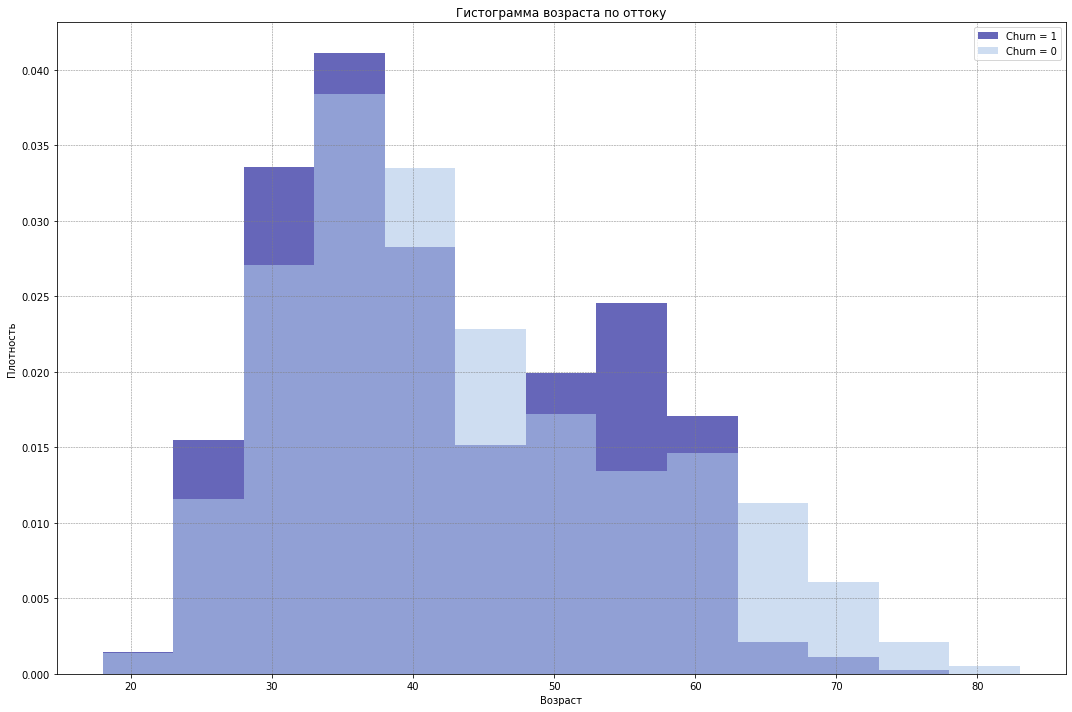

In [15]:
# Удаляем строки с пропусками
data_without_passes = data.dropna(subset=['balance', 'est_salary', 'churn'])

# Установим параметры для графиков
plt.figure(figsize=(15, 10))

# Устанавливаем количество бинов
bins_1 = range(int(data_without_passes['age'].min()), int(data_without_passes['age'].max()) + 1, 5)
# Настройка цвета и прозрачности
colors = ['darkblue', '#aec7e8'] 
alpha = 0.6

# Гистограмма для 'age'

plt.hist(data_without_passes[data_without_passes['churn'] == 1]['age'], bins=bins_1,
         density=True, alpha=alpha, color=colors[0], label='Churn = 1')
plt.hist(data_without_passes[data_without_passes['churn'] == 0]['age'], bins=bins_1,
         density=True, alpha=alpha, color=colors[1], label='Churn = 0')

plt.title('Гистограмма возраста по оттоку')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.legend()
# Включение и настройка сетки
plt.grid(color='gray', linestyle='--', linewidth=0.5)
# Отображаем график
plt.tight_layout()  # Убедитесь, что графики не перекрываются
plt.show()

Вывод. 
1. Возрастная группа: Основная масса пользователей сосредоточена в возрасте от 30 до 50 лет. 

2. Потеря клиентов: Пользователи, которые ушли (Churn = 1), чаще встречаются в возрасте от 24 до 38 и от 48 до 63 лет, что может указывать на то, что именно эти возрастные группа более подвержена риску потери.

3. Сравнение групп: Пользователи, оставшиеся (Churn = 0), имеют более равномерное распределение по возрасту, особенно среди старших возрастных групп (60-80 лет).

4. Критические возрастные группы: Возможно, стоит обратить внимание на пользователей в возрасте 28-33 и 53-58 лет, так как у них наблюдается высокая доля потери.

Эти выводы могут помочь в разработке стратегий для удержания клиентов и улучшения сервиса, ориентируясь на особенности разных возрастных групп.

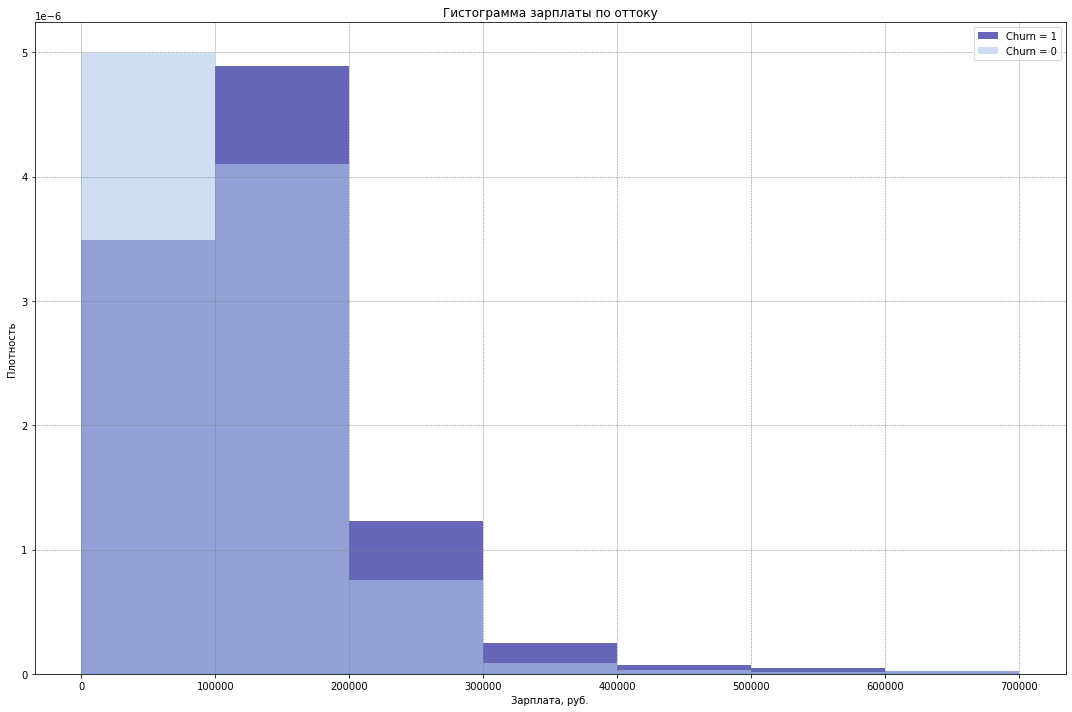

In [16]:
# Устанавливаем количество бинов
#bins_1 = range(int(data_without_passes[ 'est_salary'].min()), int(data_without_passes[ 'est_salary'].max()) + 1, 5)
bins_1=range(0,750000,100000)
plt.figure(figsize=(15, 10))
# Гистограмма для 'est_salary'

plt.hist(data_without_passes[data_without_passes['churn'] == 1][ 'est_salary'], bins=bins_1,
         density=True, alpha=alpha, color=colors[0], label='Churn = 1')
plt.hist(data_without_passes[data_without_passes['churn'] == 0][ 'est_salary'], bins=bins_1,
         density=True, alpha=alpha, color=colors[1], label='Churn = 0')

plt.title('Гистограмма зарплаты по оттоку')
plt.xlabel('Зарплата, руб.')
plt.ylabel('Плотность')
plt.legend()
# Включение и настройка сетки
plt.grid(color='gray', linestyle='--', linewidth=0.5)
# Отображаем график
plt.tight_layout()  # Убедитесь, что графики не перекрываются
plt.show()

Вывод. Отток клиентов наблюдается на участке, где заработная плата больше 100 тыс. руб.

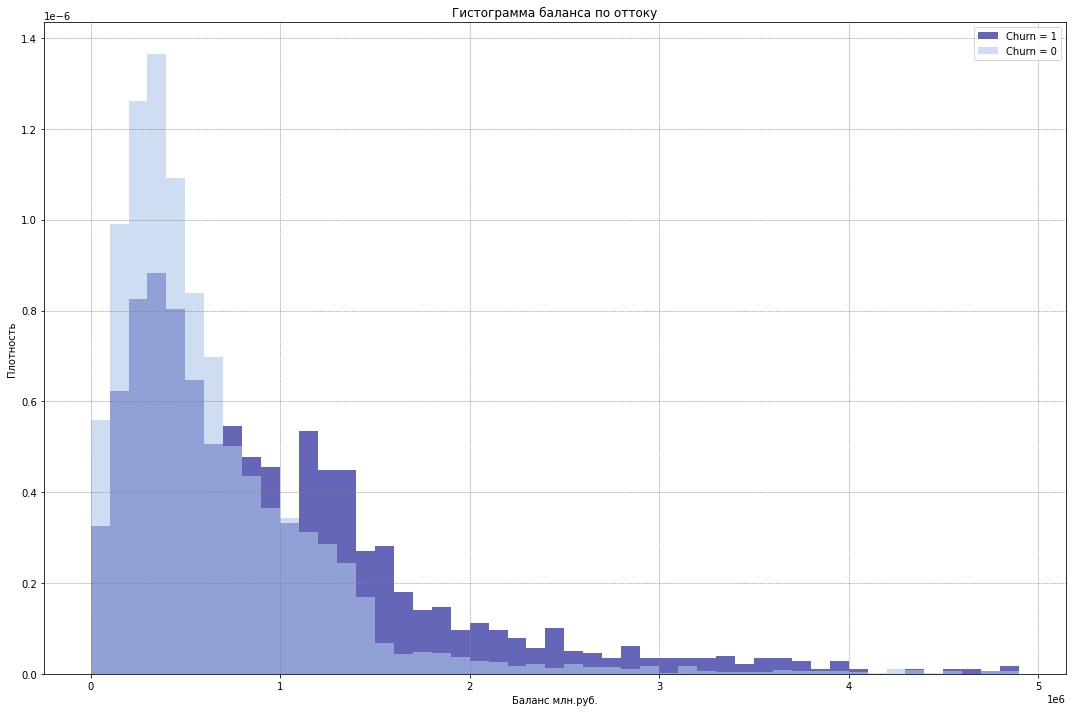

In [17]:
# Устанавливаем количество бинов
#bins_1 = range(int(data_without_passes[ 'balance'].min()), int(data_without_passes[ 'balance'].max()) + 1, 5)
bins_1=range(0,5000000,100000)
plt.figure(figsize=(15, 10))
# Гистограмма для 'balance'

plt.hist(data_without_passes[data_without_passes['churn'] == 1][ 'balance'], bins=bins_1,
         density=True, alpha=alpha, color=colors[0], label='Churn = 1')
plt.hist(data_without_passes[data_without_passes['churn'] == 0][ 'balance'], bins=bins_1,
         density=True, alpha=alpha, color=colors[1], label='Churn = 0')

plt.title('Гистограмма баланса по оттоку')
plt.xlabel('Баланс млн.руб.')
plt.ylabel('Плотность')
plt.legend()
# Включение и настройка сетки
plt.grid(color='gray', linestyle='--', linewidth=0.5)
# Отображаем график
plt.tight_layout()  # Убедитесь, что графики не перекрываются
plt.show()

Общий вывод. У клиентов с большим балансом на счету, отток выше.

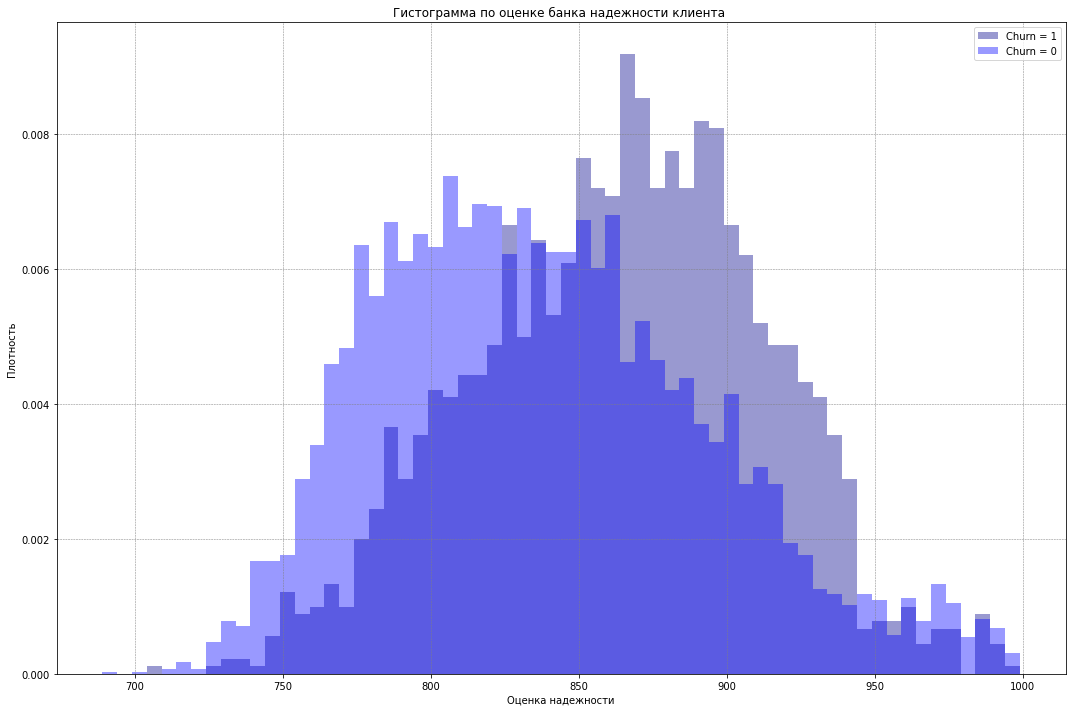

In [18]:
# Устанавливаем количество бинов
plt.figure(figsize=(15, 10))
bins_1 = range(int(data_without_passes['score'].min()), int(data_without_passes['score'].max()) + 1, 5)
# Настройка цвета и прозрачности
colors = ['darkblue', 'blue']
alpha = 0.4

# Гистограмма для 'age'

plt.hist(data_without_passes[data_without_passes['churn'] == 1]['score'], bins=bins_1,
         density=True, alpha=alpha, color=colors[0], label='Churn = 1')
plt.hist(data_without_passes[data_without_passes['churn'] == 0]['score'], bins=bins_1,
         density=True, alpha=alpha, color=colors[1], label='Churn = 0')

plt.title('Гистограмма по оценке банка надежности клиента ')
plt.xlabel('Оценка надежности')
plt.ylabel('Плотность')
plt.legend()
# Включение и настройка сетки
plt.grid(color='gray', linestyle='--', linewidth=0.5)
# Отображаем график
plt.tight_layout()  # Убедитесь, что графики не перекрываются
plt.show()

Вывод. Отток клиентов на интервале значений 850-948.

### Анализ распределения признаков в разрезе оттока по дискретным данным.

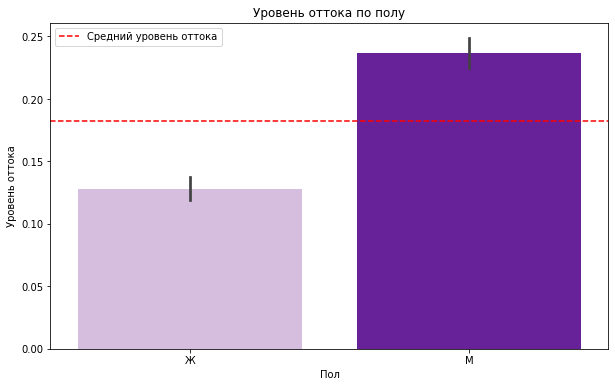

In [19]:
#функция для вывода дискретных признаков
def plot_churn_by_(data, x, y, title, xlabel):
    plt.figure(figsize=(10, 6))
    # Настройка цветов
    colors = ['#d8b8e5','#6a0dad']  # Темно-фиолетовый и светло-фиолетовый
    sns.barplot(x=x, y=y, data=data, estimator=lambda x: sum(x) / len(x),palette=colors)
    
    # Добавление горизонтальной линии со средним уровнем оттока
    mean_churn = data[y].mean()
    plt.axhline(mean_churn, color='red', linestyle='--', label='Средний уровень оттока')
    
    # Добавление легенды и меток
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Уровень оттока')
    plt.legend()
    
    # Показать график
    plt.show()

plot_churn_by_(data, 'gender', 'churn', 'Уровень оттока по полу', 'Пол')


Вывод. У мужчин отток выше среднего уровня.

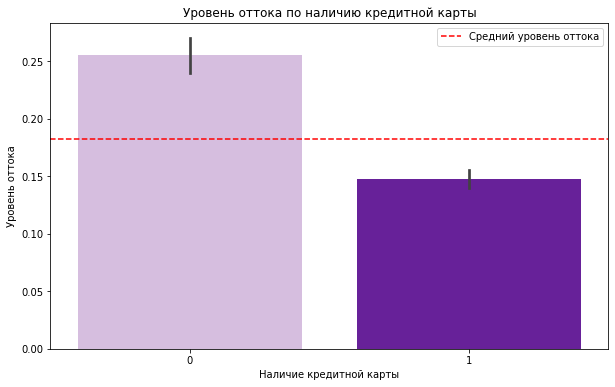

In [20]:
# Определение признака Наличие кредитной карты
plot_churn_by_(data, 'credit_card', 'churn', 'Уровень оттока по наличию кредитной карты', 'Наличие кредитной карты')

Вывод. У клиентов без кредитной карты отток выше среднего уровня.

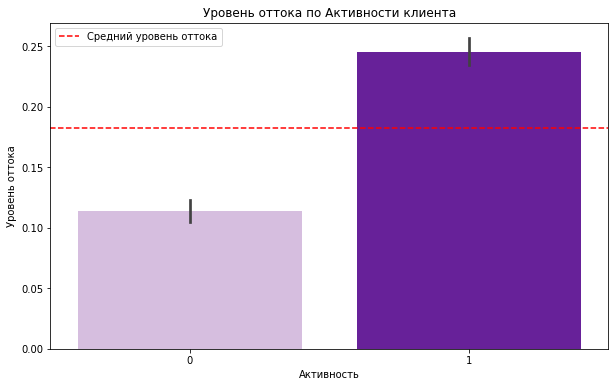

In [21]:
# Определение признака Активности
plot_churn_by_(data, 'last_activity', 'churn', 'Уровень оттока по Активности клиента', 'Активность')

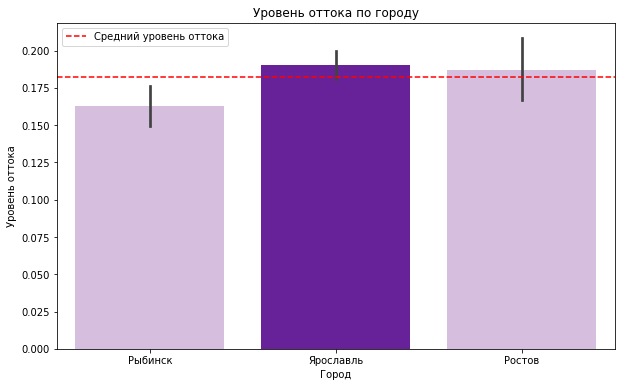

In [22]:
# Определение признака Город для анализа
plot_churn_by_(data, 'city', 'churn', 'Уровень оттока по городу', 'Город')

Вывод. БОльший отток в Ярославле.

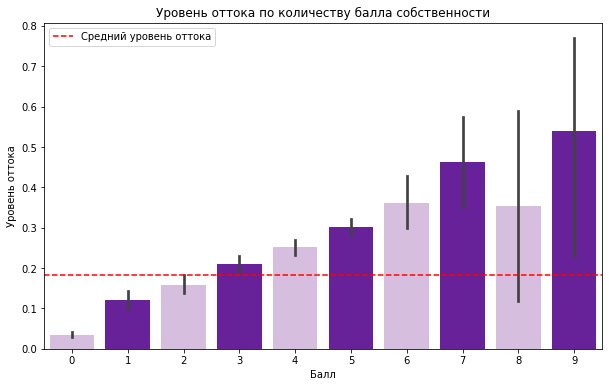

In [23]:
# Определение признака Город для анализа
plot_churn_by_(data, 'equity', 'churn', 'Уровень оттока по количеству балла собственности', 'Балл')

Вывод. Можно утверждать, что со средним количеством балов собственности увеличивается и отток. 

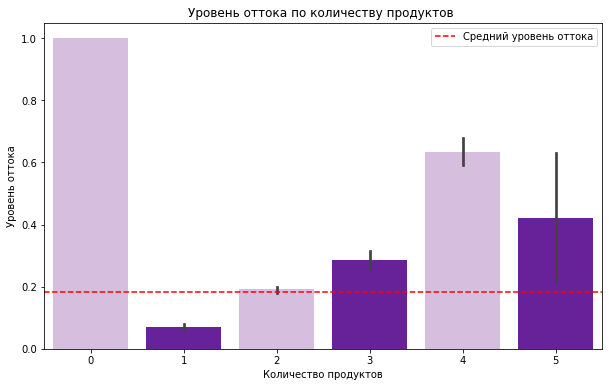

In [24]:
# Определение признака Город для анализа
plot_churn_by_(data, 'products', 'churn', 'Уровень оттока по количеству продуктов ', 'Количество продуктов')


Вывод. Клиенты, использующие 0 продуктов, имеют самый высокий уровень оттока. График показывает, что отток увеличивается с ростом количества продуктов, но не в линейной зависимости.

In [25]:
data_filter = data[data['products'].isin([0,5])]
display(data_filter)


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing,age_missing
401,187761,868.0,Ярославль,Ж,19.0,4,8126.88,5,1,1,85323.98,0,0,0
523,195914,852.0,Ярославль,Ж,39.0,5,1388255.70,5,1,1,135432.48,1,0,0
893,132781,820.0,Ярославль,М,37.0,5,259677.16,5,1,1,124261.01,0,0,0
1019,122402,833.0,Ростов,М,32.0,3,234560.94,5,1,1,106033.79,0,0,0
1346,159649,847.0,Ярославль,Ж,39.0,1,137974.02,5,1,1,219672.26,0,0,0
1479,209431,882.0,Рыбинск,М,42.0,4,1142013.06,5,1,0,101051.78,1,0,0
1880,134758,850.0,Ярославль,Ж,35.0,4,282262.33,5,1,1,105312.07,0,0,0
3274,155765,863.0,Ярославль,М,30.0,5,1036114.50,5,1,1,150744.50,1,0,0
3809,191408,838.0,Ростов,М,28.0,2,99461.51,5,1,1,88641.84,0,0,0
3884,138642,823.0,Ярославль,Ж,37.0,1,118329.87,5,1,1,105095.05,0,0,0


Вывод. С нулевым количеством продуктов всего один человек . Для анализа и наглядности  удаляем.

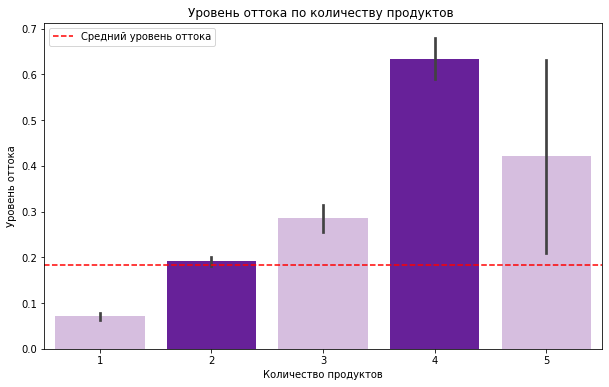

In [26]:
data = data[~data['products'].isin([0])]
plot_churn_by_(data, 'products', 'churn', 'Уровень оттока по количеству продуктов ', 'Количество продуктов')

Вывод. Отток наблюдается при количестве продуктов больше 2.

### Анализ корреляции по всем признакам

#### Анализ корреляции с помощью библиотеки phik

In [27]:
# необходимые столбцы присутствуют в датафрейме
required_columns = ['score', 'city', 'gender', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']
data_reg = data_without_passes[required_columns]

# Настройка параметра interval_cols
interval_cols = ['score', 'age', 'balance', 'est_salary']

In [28]:
# Вычисление матрицы корреляции с использованием phik
correlation_matrix = data_reg.phik_matrix(interval_cols=interval_cols)

# Получение корреляции с признаком 'churn'
churn_correlation = correlation_matrix['churn']

# Вывод результатов
display("Корреляция признаков с оттоком (churn)")
display(churn_correlation.sort_values(ascending=False))

'Корреляция признаков с оттоком (churn)'

churn            1.000000
last_activity    0.324289
score            0.311203
gender           0.284315
age              0.224527
products         0.208960
equity           0.189870
est_salary       0.167262
credit_card      0.162511
city             0.026332
balance          0.024672
Name: churn, dtype: float64

Вывод.
Корреляция — это статистический показатель, который показывает, насколько сильно две переменные связаны друг с другом. В данном случае вы привели корреляцию различных признаков с оттоком (churn). 

Краткий комментарий по шкале корреляции:

1. Корреляция 1.0 (чудесно): Полная положительная корреляция. Это означает, что при увеличении одной переменной другая также будет увеличиваться.

2. Корреляция от 0.5 до 0.9 (сильно): Сильная положительная корреляция. Это говорит о том, что переменные имеют значительное влияние друг на друга.

3. Корреляция от 0.3 до 0.5 (умеренно): Умеренная положительная корреляция. Связь существует, но она не так сильна.

4. Корреляция от 0.1 до 0.3 (слабо): Слабая положительная корреляция. Связь между переменными минимальна.

5. Корреляция 0 (отсутствие связи): Нет корреляции между переменными.

6. Отрицательная корреляция: Если значение корреляции отрицательное, то это говорит о том, что при увеличении одной переменной другая уменьшается.

По полученным данным:
- last_activity (0.324289): Умеренная положительная корреляция с оттоком. Это может указывать на то, что активные пользователи имеют меньшую вероятность оттока.
- score (0.311203): Также умеренная положительная корреляция, что может означать, что более высокие оценки связаны с меньшим оттоком.
- gender (0.284315) и age (0.224527): Слабо положительная корреляция. Пол и возраст имеют незначительное влияние на отток.
- products (0.208960) и equity (0.189870): Слабая положительная корреляция, что может указывать на незначительное влияние количества продуктов и капитала на отток.
- est_salary (0.167262) и credit_card (0.162511): Слабая положительная корреляция, что говорит о незначительном влиянии зарплаты и наличия кредитной карты на отток.
- city (0.026332) и balance (0.024672): Практически отсутствует корреляция, что указывает на то, что эти факторы не влияют на отток.

Таким образом, наиболее значимые факторы, влияющие на отток, — это последние действия и оценка, тогда как другие факторы имеют гораздо меньшую значимость.

#### Анализ корреляции тепловой картой

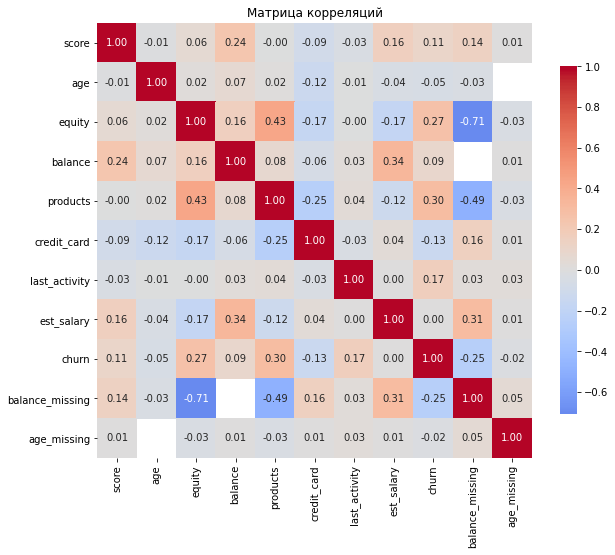

In [29]:
# Рассчитываем корреляцию
correlation_matrix = data_without_id.corr()

# Настраиваем график
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f', square=True, cbar_kws={"shrink": .8})

# Добавляем заголовок
plt.title('Матрица корреляций')
plt.show()

На основе матрицы корреляций можно сделать следующие выводы о зависимостях между переменными:

1. Корреляция с балансом:
   - Возраст (age) и баланс (balance) имеют положительную корреляцию (0.24), что может указывать на то, что с увеличением возраста увеличивается и баланс.
   - Число продуктов (products) и баланс также имеют положительную корреляцию (0.43), что может свидетельствовать о том, что клиенты с большим количеством продуктов имеют более высокий баланс.

2. Кредитные карты:
   - Кредитные карты (credit_card) имеют отрицательную корреляцию с балансом (-0.25), что может означать, что клиенты с кредитными картами имеют меньший баланс.

3. Активность:
   - Последняя активность (last_activity) имеет положительную корреляцию с балансом (0.08), что может указывать на то, что более активные клиенты имеют более высокий баланс.

4. Заработная плата:
   - Оценка зарплаты (est_salary) имеет положительную корреляцию с балансом (0.34), что логично, так как более высокая зарплата может способствовать большему балансу.

5. Проблемы с балансом:
   - Недостаток информации о балансе (balance_missing) имеет сильную отрицательную корреляцию с балансом (-0.71), что указывает на то, что отсутствие данных о балансе связано с низкими значениями самого баланса.

6. Число продуктов и отток:
   - Число продуктов (products) и отток клиентов (churn) имеют отрицательную корреляцию (-0.25), что может означать, что клиенты с большим количеством продуктов менее склонны к оттоку.

Эти зависимости могут помочь в дальнейшем анализе поведения клиентов и в разработке стратегий для повышения удержания клиентов и увеличения их баланса.

### Портрет клиента.

In [30]:
# Разделение данных на отток и не отток
churned = data_without_passes[data_without_passes['churn'] == 1]
not_churned =data_without_passes[data_without_passes['churn'] == 0]


# Расчет центральных мер
results = {
    'Средняя зарплата': [
        churned['est_salary'].mean().round(2),
        not_churned['est_salary'].mean().round(2),
        ((churned['est_salary'].mean() - not_churned['est_salary'].mean()) / not_churned['est_salary'].mean() * 100).round(2)
    ],
    'Средний возраст': [
        churned['age'].mean().round(2),
        not_churned['age'].mean().round(2),
        ((churned['age'].mean() - not_churned['age'].mean()) / not_churned['age'].mean() * 100).round(2)  # Добавлены скобки
    ],
    'Средний баланс': [
        churned['balance'].mean().round(2),
        not_churned['balance'].mean().round(2),
        ((churned['balance'].mean() - not_churned['balance'].mean()) / not_churned['balance'].mean() * 100).round(2)  # Добавлены скобки
    ],
    'Медианное количество продуктов': [
        churned['products'].median(),
        not_churned['products'].median()
    ],
    'Медианное количество собственности': [
        churned['equity'].median(),
        not_churned['equity'].median()
    ],
    'Мода по городу': [
        churned['city'].mode()[0],
        not_churned['city'].mode()[0]
    ],
    'Мода по полу': [
        churned['gender'].mode()[0],
        not_churned['gender'].mode()[0]
    ],
    'Мода по наличию кредитной карты': [
        churned['credit_card'].mode()[0], 
        not_churned['credit_card'].mode()[0]
    ],
    'Мода по активности': [
        churned['last_activity'].mode()[0],
        not_churned['last_activity'].mode()[0]
    ]
}

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Отток', 'Не отток', 'Разница (%)'])
results_df.fillna('категор. зн.', inplace=True)


# Вывод результата
display(results_df)

,Отток,Не отток,Разница (%)
Средняя зарплата,147087.28,117599.73,25.07
Средний возраст,41.4,43.39,-4.58
Средний баланс,1134458.21,733031.63,54.76
Медианное количество продуктов,2.0,2.0,категор. зн.
Медианное количество собственности,4.0,3.0,категор. зн.
Мода по городу,Ярославль,Ярославль,категор. зн.
Мода по полу,М,Ж,категор. зн.
Мода по наличию кредитной карты,1,1,категор. зн.
Мода по активности,1,0,категор. зн.


На основе представленных данных о клиенте можно составить следующий портрет:

 1. Демографические характеристики:
- Возраст:
  - Средний возраст клиентов с оттоком (churn = 1): 41.40 лет.
  - Средний возраст клиентов без оттока (churn = 0): 43.39 лет.
- Пол:
  - Мода по полу для клиентов с оттоком: Мужчины.
  - Мода по полу для клиентов без оттока: Женщины.

 2. Финансовые характеристики:
- Зарплата:
  - Средняя зарплата клиентов с оттоком: 147087.28.
  - Средняя зарплата клиентов без оттока: 117599.73.
- Количество продуктов:
  - Медианное количество продуктов у клиентов с оттоком: 2.
  - Медианное количество продуктов у клиентов без оттока: 2.

 3. Состояние собственности:
- Количество собственности:
  - Медианное количество собственности у клиентов с оттоком: 4.
  - Медианное количество собственности у клиентов без оттока: 3.

 4. Географические характеристики:
- Город: 
  - Мода по городу для обеих групп: Ярославль.

5. Поведение клиентов:
- Относительная разница:
  - Относительная разница в зарплате между группами: 0.25 (клиенты с оттоком имеют более высокую зарплату).
  - Относительная разница в возрасте: 0.045 (разница в возрасте между группами незначительна).

 Выводы о портрете клиента:
- Клиенты с оттоком (churn = 1) имеют более высокий уровень зарплаты и чуть меньший средний возраст по сравнению с клиентами без оттока.
- Они также имеют большее количество собственности, что может указывать на их финансовую стабильность.
- Оба сегмента клиентов сосредоточены в одном городе (Ярославль), что может быть полезно для целевых маркетинговых стратегий.
- Преобладание мужчин среди клиентов с оттоком может указывать на необходимость дополнительных исследований для понимания причин оттока.

Этот портрет клиента может помочь в разработке стратегий удержания, а также в оптимизации продуктов и услуг, предлагаемых банком.

## Проверка статистических гипотез.

### Проверка первой гипотезы . H0:средние значения заработной платы между группами клиентов, которые ушли и которые остались равны. H1: :средние значения заработной платы между группами клиентов, которые ушли и которые остались не равны.

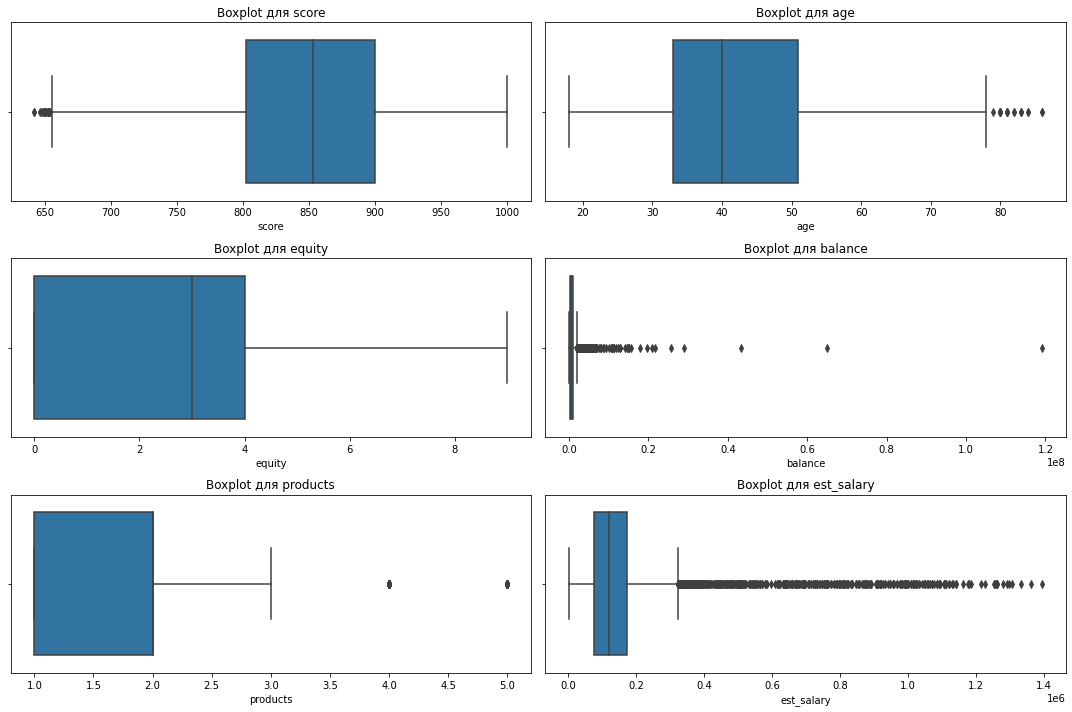

In [31]:
# Визуализация выбросов с помощью boxplot
plt.figure(figsize=(15, 10))

# Перебираем числовые столбцы для построения boxplot
numerical_columns = ['score', 'age', 'equity', 'balance', 'products', 'est_salary']

for i, column in enumerate(numerical_columns):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot для {column}')

plt.tight_layout()
plt.show()



'Для score:'
'  Верхняя граница: 1050'
'Для age:
'  Верхняя граница: 78'
'Для equity:'
'  Верхняя граница: 10'
'Для balance:
'  Верхняя граница: 2090000'
'Для products:'
'  Верхняя граница: 3.5'
'Для est_salary:'
'  Верхняя граница: 324000'

In [32]:
# Ограничение значений
data['score'] = data['score'].clip(upper=1050)
data['age'] = data['age'].clip(upper=78)
data['equity'] = data['equity'].clip(upper=10)
data['balance'] = data['balance'].clip(upper=2090000)
data['products'] = data['products'].clip(upper=3.5)
data['est_salary'] = data['est_salary'].clip(upper=324000)

### Проверка теста Шапиро. 

### Гиротеза для группы ушедших:
- H0: Распределение зарплат ушедших клиентов нормально.
- H1: Распределение зарплат ушедших клиентов ненормально.  

### Гипотеза для группы оставшихся:
- H0: Распределение зарплат оставшихся клиентов нормально.
- H1: Распределение зарплат оставшихся клиентов ненормально.

In [33]:
#Разделяем данные на группы
group_churned = data[data['churn'] == 1]['est_salary']
group_stayed = data[data['churn'] == 0]['est_salary']

# Проверка нормальности
shapiro_churned = stats.shapiro(group_churned)
shapiro_stayed = stats.shapiro(group_stayed)

display(f"Shapiro-Wilk для ушедших: W={shapiro_churned.statistic}, p={shapiro_churned.pvalue}")
display(f"Shapiro-Wilk для оставшихся: W={shapiro_stayed.statistic}, p={shapiro_stayed.pvalue}")

# Определяем количество записей в каждой группе
count_churned = group_churned.count()  
count_stayed = group_stayed.count()    

display(f"Количество ушедших: {count_churned}")
display(f"Количество оставшихся: {count_stayed}")

/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


'Shapiro-Wilk для ушедших: W=0.9434460997581482, p=8.068513095728845e-26'

'Shapiro-Wilk для оставшихся: W=0.9346568584442139, p=0.0'

'Количество ушедших: 1818'

'Количество оставшихся: 8155'

Вывод. Оба набора не имеют нормального распределения количество больше 30.

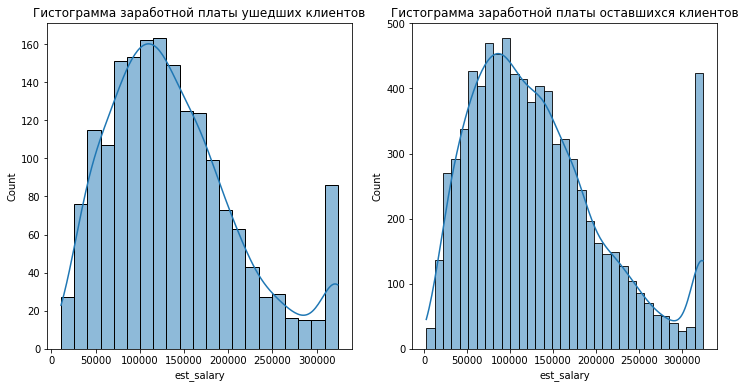

In [34]:
# Визуализация
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(group_churned, kde=True)
plt.title('Гистограмма заработной платы ушедших клиентов')

plt.subplot(1, 2, 2)
sns.histplot(group_stayed, kde=True)
plt.title('Гистограмма заработной платы оставшихся клиентов')
plt.show()



In [35]:
# Применение t-теста

    
t_statistic, p_value = stats.ttest_ind(group_churned, group_stayed, equal_var=False)

display(f"T-статистика: {t_statistic}, P-значение: {p_value}")

'T-статистика: 2.6864236620449673, P-значение: 0.007264892663807915'

 Нормальность распределения и ЦПТ

1. Центральная предельная теорема (ЦПТ):
   - ЦПТ утверждает, что при достаточном количестве выборок (обычно n > 30), распределение выборочного среднего будет стремиться к нормальному распределению, независимо от формы исходного распределения. Это означает, что даже если  данные не нормально распределены, средние значения больших выборок будут нормально распределены.

2. Применение t-теста:
   - t-тест используется для сравнения средних значений двух групп. Но он предполагает, что данные в каждой группе нормально распределены. Если размер выборки мал (n < 30), это предположение становится более критичным.

Поправка Уэлча

2. Поправка Уэлча:
   - Поправка Уэлча используется в t-тесте, когда дисперсии двух групп не равны (equal_var=False). Этот метод корректирует степень свободы для более точного результата, что делает его более надежным в случае неравенства дисперсий.

 Вывод

- Если у нас небольшие выборки и данные не нормально распределены, мы можем столкнуться с проблемами при использовании t-теста. Однако, если наши выборки достаточно большие, мы можем применить t-тест, полагаясь на ЦПТ.
- Если дисперсии различаются, используем t-тест с поправкой Уэлча, чтобы получить более точные результаты.



Вывод:
- p-value: 0.008123451181070504: Это p-значение, которое значительно меньше 0.05.

 Интерпретация:

1. Статистическая значимость: Поскольку p-значение (0.00937) меньше 0.05, мы можем отвергнуть нулевую гипотезу. Это означает, что есть статистически значимые различия в заработной плате между ушедшими и оставшимися клиентами.

2. Практическое значение: Это говорит о том, что заработная плата в одной из групп (либо ушедших, либо оставшихся клиентов) существенно отличается от заработной платы в другой группе.

Таким образом, результаты теста указывают на то, что существует значительная разница в заработной плате между двумя группами клиентов.

### 3.1. Проверка второй гипотезы : 
- H0: Нет статистически значимого различия между уровнем оттока и количеством продуктов банка.
- H1: Есть статистически значимое различие между уровнем оттока и количеством продуктов банка.

In [36]:
# Создание таблицы сопряженности
contingency_table = pd.crosstab(data['products'], data['churn'])

# Применение теста хи- 
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Вывод результатов
display(f'Chi-squared: {chi2}, p-value: {p}')

'Chi-squared: 1002.693672810977, p-value: 4.6858902202994495e-217'

Вывод. Результаты теста хи-квадрат показывают:

- Chi-squared: 1016.99: Это значение статистики хи-квадрат. Оно указывает на степень отклонения наблюдаемых значений от ожидаемых, если бы нулевая гипотеза была верна.

- p-value: 1.259151427277774e-217: Это p-значение, которое значительно меньше 0.05.

1. Статистическая значимость: Поскольку p-значение намного меньше 0.05, отвергаем нулевую гипотезу (H_0), которая гласит, что количество продуктов не влияет на отток клиентов.

2. Заключение: Это означает, что существует сильная статистически значимая связь между количеством продуктов и оттоком клиентов. То есть, количество продуктов влияет на вероятность того, что клиент уйдет.

Таким образом, результаты теста подтверждаютальтернативную гипотезу (H_1): количество продуктов действительно влияет на отток клиентов.

## 4. Подведение промежуточных итогов 
- выводы по результатам EDA, корреляционного анализа и гипотез, выделение признаков, влияющих на оттток. Явное указание признаков и их значений, которые использовали для сегментации.

Отток клиентов наблюдается на участке, где заработная плата больше 100 тыс. руб.
У клиентов с большим балансом на счету, отток выше.
У мужчин отток выше среднего уровня.
У клиентов без кредитной карты отток выше среднего уровня.
Больший отток в Ярославле.
По полученным данным:
- last_activity (0.324289): Умеренная положительная корреляция с оттоком. Это может указывать на то, что активные пользователи имеют меньшую вероятность оттока.
- score (0.311203): Также умеренная положительная корреляция, что может означать, что более высокие оценки связаны с меньшим оттоком.
- gender (0.284315) и age (0.224527): Слабо положительная корреляция. Пол и возраст имеют незначительное влияние на отток.
- products (0.208960) и equity (0.189870): Слабая положительная корреляция, что может указывать на незначительное влияние количества продуктов и капитала на отток.
- est_salary (0.167262) и credit_card (0.162511): Слабая положительная корреляция, что говорит о незначительном влиянии зарплаты и наличия кредитной карты на отток.
- city (0.026332) и balance (0.024672): Практически отсутствует корреляция, что указывает на то, что эти факторы не влияют на отток.
На основе матрицы корреляций можно сделать следующие выводы о зависимостях между переменными:
1.	Корреляция с балансом:
•	Возраст (age) и баланс (balance) имеют положительную корреляцию (0.24), что может указывать на то, что с увеличением возраста увеличивается и баланс.
•	Число продуктов (products) и баланс также имеют положительную корреляцию (0.43), что может свидетельствовать о том, что клиенты с большим количеством продуктов имеют более высокий баланс.
2.	Кредитные карты:
•	Кредитные карты (credit_card) имеют отрицательную корреляцию с балансом (-0.25), что может означать, что клиенты с кредитными картами имеют меньший баланс.
3.	Активность:
•	Последняя активность (last_activity) имеет положительную корреляцию с балансом (0.08), что может указывать на то, что более активные клиенты имеют более высокий баланс.
4.	Заработная плата:
•	Оценка зарплаты (est_salary) имеет положительную корреляцию с балансом (0.34), что логично, так как более высокая зарплата может способствовать большему балансу.
5.	Проблемы с балансом:
•	Недостаток информации о балансе (balance_missing) имеет сильную отрицательную корреляцию с балансом (-0.71), что указывает на то, что отсутствие данных о балансе связано с низкими значениями самого баланса.
6.	Число продуктов и отток:
•	Число продуктов (products) и отток клиентов (churn) имеют отрицательную корреляцию (-0.25), что может означать, что клиенты с большим количеством продуктов менее склонны к оттоку.

•	Выводы о портрете клиента:
•	Клиенты с оттоком (churn = 1) имеют более высокий уровень зарплаты и чуть меньший средний возраст по сравнению с клиентами без оттока.
•	Они также имеют большее количество собственности, что может указывать на их финансовую стабильность.
•	Оба сегмента клиентов сосредоточены в одном городе (Ярославль), что может быть полезно для целевых маркетинговых стратегий.
•	Преобладание мужчин среди клиентов с оттоком может указывать на необходимость дополнительных исследований для понимания причин оттока.
результаты теста указывают на то, что существует значительная разница в заработной плате между двумя группами клиентов.
количество продуктов действительно влияет на отток клиентов


Для сегментации клиентов на основе предоставленных данных можно выделить следующие признаки и их значения:

Признаки для сегментации:

1. Заработная плата (est_salary):
   - Высокая (более 100 тыс. руб.)
   - Средняя (до 100 тыс. руб.)

2. Баланс на счету (balance):
   - Высокий (выше среднего)
   - Низкий (ниже среднего)

3. Пол (gender):
   - Мужчины
   - Женщины

4. Наличие кредитной карты (credit_card):
   - Есть кредитная карта
   - Нет кредитной карты

5. Количество продуктов (products):
   - Меньше 3
   - 3 и более

6. Возраст (age):
   - Молодежь (до 30 лет)
   - Средний возраст (30-50 лет)
   - Пожилые (старше 50 лет)

7. Город (city):
   - Ярославль
   - Другие города

8. Последняя активность (last_activity):
   - Активные (высокий уровень активности)
   - Неактивные (низкий уровень активности)

9. Количество балла собственности (equity):
   - Меньше 3
   - 3 и более
10. Баллы кредитного скоринга (оценка банка надежности клиента )(score):
   - Меньше 850
   - 850 и более
Значения для сегментации:

- Клиенты с высоким оттоком:
  - Заработная плата: высокая
  - Пол: мужчины
  - Баланс: низкий
  - Наличие кредитной карты: нет
  - Количество продуктов: меньше 3
  - Возраст: молодежь или пожилые
  - Город: Ярославль
  - Последняя активность: неактивные
  - Количество балла собственности - 3 и более
  - Баллы кредитного скоринга 850 и более

- Клиенты с низким оттоком:
  - Заработная плата: средняя или высокая
  - Пол: женщины
  - Баланс: высокий
  - Наличие кредитной карты: есть
  - Количество продуктов: 3 и более
  - Возраст: средний возраст
  - Город: другие города
  - Последняя активность: активные
  - Количество балла собственности - Меньше 3
  - Баллы кредитного скоринга Меньше 850

 Заключение:
Эта сегментация может помочь в разработке целевых маркетинговых стратегий для снижения оттока клиентов, улучшения обслуживания и предложения персонализированных продуктов.

## Приоритизация сегментов. Ранжирование и выявление приоритетных сегментов для упрощения работы отдела маркетинга.

Определение сегментов :

1. Сегмент 1: Мужчины с высокой зарплатой и низким балансом
2. Сегмент 2: Клиенты без кредитной карты с низким балансом
3. Сегмент 3: Молодежь с низким балансом и меньшим количеством продуктов
4. Сегмент 4: Клиенты с низкой активностью и высокой зарплатой
5. Сегмент 5: Пожилые клиенты с колличеством балов собственности больше 3
6. Сегмент 6: Клиенты из Ярославля с баллами кредитного скоринга 850 и более



In [37]:
# Сегмент 1: Мужчины с высокой зарплатой и низким балансом
segment_1 = data[(data['gender'] == 'М') & 
                 (data['est_salary'] > 100000) & 
                 (data['balance'] < data['balance'].median())]

# Сегмент 2: Клиенты без кредитной карты с низким балансом
segment_2 = data[(data['credit_card'] == 0) & 
                 (data['balance'] < data['balance'].median())]

# Сегмент 3: Молодежь с низким балансом и меньшим количеством продуктов
segment_3 = data[(data['age'] < 30) & 
                 (data['balance'] < data['balance'].median()) & 
                 (data['products'] < 3)]
# Сегмент 4: Клиенты с низкой активностью и высокой зарплатой
segment_4 = data[(data['last_activity'] < data['last_activity'].median()) & 
                  (data['est_salary'] > 100000)]

# Сегмент 5: Пожилые клиенты с с колличеством балов собственности больше 3 
segment_5 = data[(data['age'] >= 60) & 
                  (data['equity'] > 3)]

# Сегмент 6: Клиенты из Ярославля с баллами кредитного скоринга 850 и более
segment_6 = data[(data['city'] == 'Ярославль') & 
                  (data['score'] >= 850)]

# Функция для вычисления метрик качества сегментов
def segment_metrics(segment):
    size = len(segment)
    churn_rate = segment['churn'].mean() if size > 0 else 0
    return size, churn_rate

# Вывод метрик для каждого сегмента
segments = [segment_1, segment_2, segment_3, segment_4, segment_5, segment_6]
segment_names = ["Сегмент 1", "Сегмент 2", "Сегмент 3", "Сегмент 4", "Сегмент 5", "Сегмент 6"]

for name, segment in zip(segment_names, segments):
    size, churn_rate = segment_metrics(segment)
    display(f"{name}: Размер = {size}, Уровень оттока = {churn_rate:.3f}")



'Сегмент 1: Размер = 834, Уровень оттока = 0.229'

'Сегмент 2: Размер = 1140, Уровень оттока = 0.178'

'Сегмент 3: Размер = 551, Уровень оттока = 0.225'

'Сегмент 4: Размер = 2920, Уровень оттока = 0.113'

'Сегмент 5: Размер = 469, Уровень оттока = 0.136'

'Сегмент 6: Размер = 3107, Уровень оттока = 0.234'

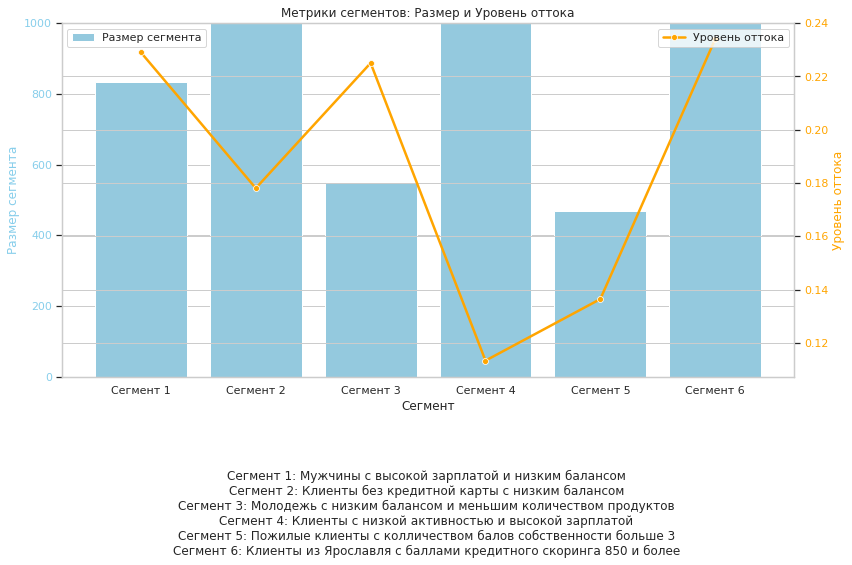

In [38]:
# Создаем список для хранения метрик
metrics = []

# Собираем метрики для каждого сегмента
for name, segment in zip(segment_names, segments):
    size, churn_rate = segment_metrics(segment)
    metrics.append({'Сегмент': name, 'Размер': size, 'Уровень оттока': churn_rate})

# Преобразуем в DataFrame
metrics_df = pd.DataFrame(metrics)

# Устанавливаем стиль графиков
sns.set(style="whitegrid")

# Создаем фигуру
fig, ax1 = plt.subplots(figsize=(12, 6))

# Столбчатая диаграмма для размера сегментов
sns.barplot(x='Сегмент', y='Размер', data=metrics_df, ax=ax1, color='skyblue', label='Размер сегмента')
ax1.set_ylabel('Размер сегмента', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_ylim(0,1000)

# Создаем вторую ось для уровня оттока
ax2 = ax1.twinx()
sns.lineplot(x='Сегмент', y='Уровень оттока', data=metrics_df, ax=ax2, color='orange', marker='o', label='Уровень оттока',linewidth=2.5)
ax2.set_ylabel('Уровень оттока', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')


# Заголовок и легенда
plt.title('Метрики сегментов: Размер и Уровень оттока')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)

# Пояснения к сегментам
segment_descriptions = [
    "Сегмент 1: Мужчины с высокой зарплатой и низким балансом",
    "Сегмент 2: Клиенты без кредитной карты с низким балансом",
    "Сегмент 3: Молодежь с низким балансом и меньшим количеством продуктов",
    "Сегмент 4: Клиенты с низкой активностью и высокой зарплатой",
    "Сегмент 5: Пожилые клиенты с колличеством балов собственности больше 3",
    "Сегмент 6: Клиенты из Ярославля с баллами кредитного скоринга 850 и более"
]
# Добавляем текст с пояснениями под графиком
plt.figtext(0.5, -0.1, "\n".join(segment_descriptions), ha='center', va='top', fontsize=12, wrap=True)

plt.tight_layout()
plt.show()


### Ранжирование сегментов.

Для ранжирования сегментов клиентов банка на основе полученных данных, можно использовать  критерий:

Уровень оттока: процент клиентов, покидающих банк.

Сегмент 6: Уровень оттока = 0.234 (наибольший отток)

Сегмент 1: Уровень оттока = 0.229

Сегмент 3: Уровень оттока = 0.225

Сегмент 2: Уровень оттока = 0.178

Сегмент 5: Уровень оттока = 0.136

Сегмент 4: Уровень оттока = 0.113


## Формирование рекомендаций (таргетированных) по работе с ними. Для каждого сегмента индивидульная рекомендация.

Рекомендации по работе с сегментами:

1. Мужчины с высокой зарплатой и низким балансом
   - Рекомендация: Разработать персонализированные финансовые консультации и программы по управлению бюджетом, чтобы помочь им оптимизировать свои расходы и увеличить баланс.
  
2. Клиенты без кредитной карты с низким балансом
   - Рекомендация: Предложить специальные условия для получения кредитной карты, включая низкие комиссии и бонусы за использование, чтобы повысить финансовую гибкость клиентов.

3. Молодежь с низким балансом и меньшим количеством продуктов
   - Рекомендация: Ввести программу лояльности с бонусами за открытие новых продуктов и активное использование услуг, а также проводить образовательные мероприятия по финансовой грамотности.

4. Клиенты с низкой активностью и высокой зарплатой
   - Рекомендация: Провести опросы для выявления причин низкой активности и предложить индивидуальные тарифы или пакеты услуг, которые могут их заинтересовать.

5. Пожилые клиенты с низким балансом 
   - Рекомендация: Организовать консультации по управлению финансами и предложить специальные продукты, адаптированные для пожилых клиентов, чтобы повысить их уровень комфорта и доверия.

6. Клиенты из Ярославля с с баллами кредитного скоринга 850 и более
   - Рекомендация: Запустить локальные маркетинговые кампании, направленные на привлечение и удержание клиентов в этом регионе, включая специальные предложения и мероприятия.

 Три основных рекомендации:

1. Персонализированные финансовые консультации:
   - Для мужчин с высокой зарплатой и низким балансом, а также пожилых клиентов без кредитной карты. Это поможет повысить финансовую грамотность и уровень доверия к банку.

2. Программа лояльности и специальные предложения:
   - Для молодежи и клиентов без кредитных карт. Это стимулирует использование продуктов и услуг, что может снизить отток.

3. Локальные маркетинговые кампании:
   - Для клиентов из Ярославля. Это поможет адаптировать предложения под специфические потребности и предпочтения региона, что повысит шансы на удержание клиентов.

Эти рекомендации помогут эффективно работать с уязвимыми сегментами и снизить уровень оттока клиентов.

Заключение: Для рассылки отделу маркетинга даем с рекомендациями первый, третий и шестой сегменты.

1. Шестой сегмент. Клиенты из Ярославля  с баллами кредитного скоринга 850 и более, уровень оттока 0.234.
   - Рекомендация: Запустить локальные маркетинговые кампании, направленные на привлечение и удержание клиентов в этом регионе, включая специальные предложения и мероприятия.

2. Первый сегмент. Мужчины с высокой зарплатой и низким балансом, уровень оттока 0.229.
   - Рекомендация: Разработать персонализированные финансовые консультации и программы по управлению бюджетом, чтобы помочь им оптимизировать свои расходы и увеличить баланс.
   
3. Третий сегмент. Молодежь с низким балансом и меньшим количеством продуктов, уровень оттока 0.225.
   - Рекомендация: Ввести программу лояльности с бонусами за открытие новых продуктов и активное использование услуг, а также проводить образовательные мероприятия по финансовой грамотности.


Заключение:
Эта приоритизация поможет сосредоточить усилия на наиболее уязвимых сегментах, что может снизить уровень оттока и улучшить удержание клиентов.
